In [25]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import precision, recall, f_measure, accuracy

In [7]:
df = pd.read_csv("comments_art-et-culture.csv")

In [8]:
df.head()

,Unnamed: 0,postId,comment,score,topic
0,0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture
1,1,f06aa998054e11eba66e646e69d991ea,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...,5,art-et-culture
2,2,f06aa998054e11eba66e646e69d991ea,مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...,4,art-et-culture
3,3,f06aa998054e11eba66e646e69d991ea,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...,5,art-et-culture
4,4,f1cf1b9c054e11ebb718646e69d991ea,كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...,13,art-et-culture


In [9]:
df.dtypes

Unnamed: 0     int64
postId        object
comment       object
score          int64
topic         object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10568 entries, 0 to 10567
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10568 non-null  int64 
 1   postId      10568 non-null  object
 2   comment     10568 non-null  object
 3   score       10568 non-null  int64 
 4   topic       10568 non-null  object
dtypes: int64(2), object(3)
memory usage: 412.9+ KB


In [12]:
for col in df.columns:
    print(f"{col} has {len(df[col].unique())} unique values")

Unnamed: 0 has 10568 unique values
postId has 854 unique values
comment has 10516 unique values
score has 458 unique values
topic has 1 unique values


In [15]:
df.drop(["topic"], axis = 1, inplace = True)

In [16]:
df.head()

,Unnamed: 0,postId,comment,score
0,0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9
1,1,f06aa998054e11eba66e646e69d991ea,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...,5
2,2,f06aa998054e11eba66e646e69d991ea,مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...,4
3,3,f06aa998054e11eba66e646e69d991ea,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...,5
4,4,f1cf1b9c054e11ebb718646e69d991ea,كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...,13


In [37]:
def bar_plot(input_dict):
    # plot variance accounted for by each principal component.
    fig, ax = plt.subplots(figsize = (14,8))

    df = pd.DataFrame(input_dict, index=[0])

    # Plot the feature weights as a function of the components
    df.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Tweet Number")
    ax.set_xlabel("Score")

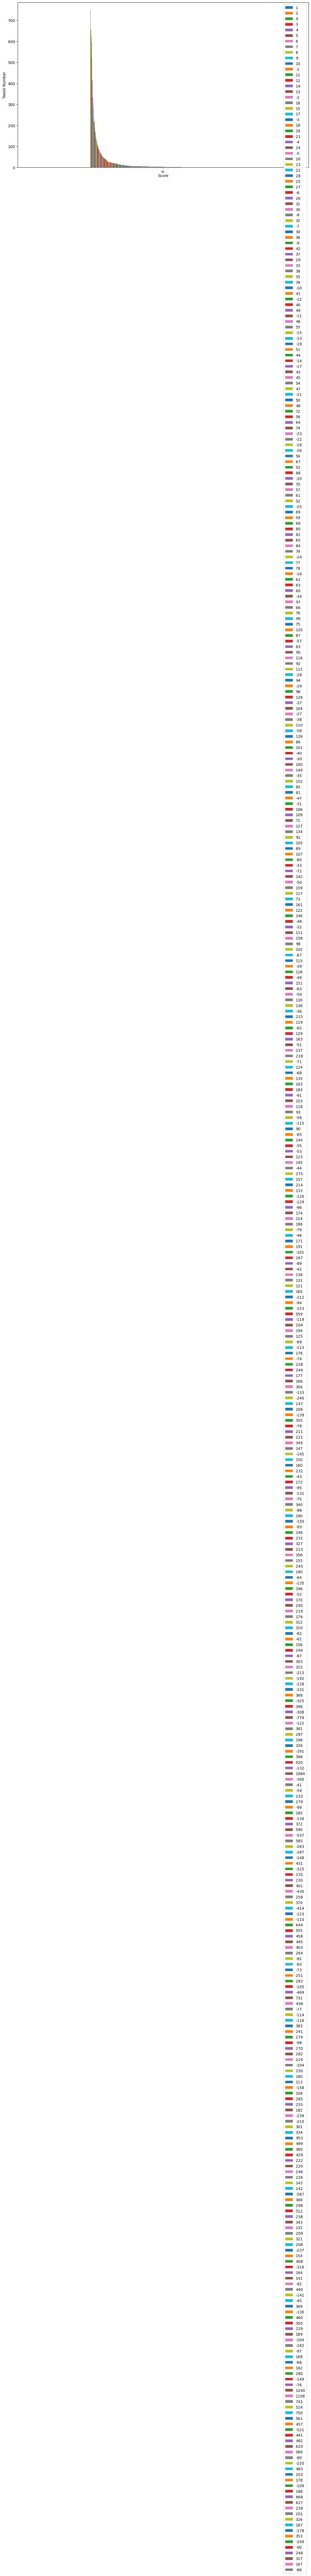

In [38]:
bar_plot(dict(df.score.value_counts()))

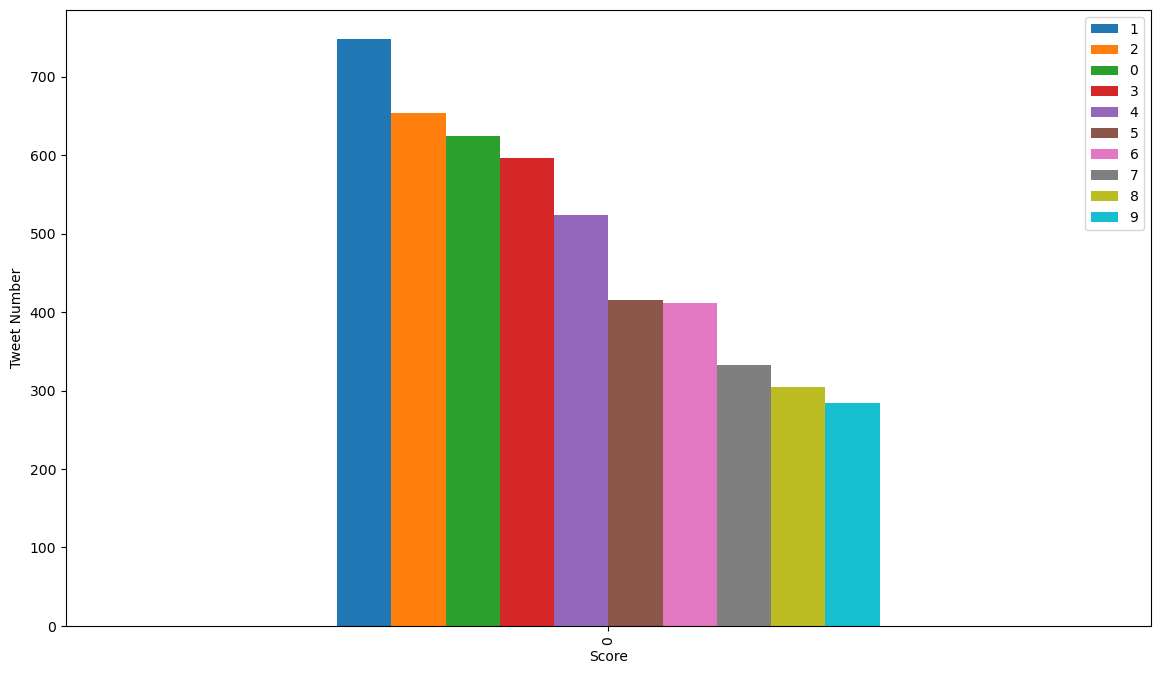

In [39]:
# iterating over the dictionary of the number of tweets per each score to get the top 10
bar_plot(dict(itertools.islice(df.score.value_counts().items(), 10)))

In [40]:
dict(df.score.value_counts())[-9]

44

In [67]:
dict(itertools.islice(df.score.value_counts().items(), 10))

{1: 748,
 2: 654,
 0: 625,
 3: 597,
 4: 524,
 5: 416,
 6: 411,
 7: 333,
 8: 305,
 9: 284}

In [61]:
def data_per_class(df, class_col, data_col):
    data_per_calss = {}
    for cls in df[class_col].unique():
        data = []
        for tweet in df[data_col][df[class_col]==cls]:
            data.append(tweet)
        data_per_calss[cls] = data
    return data_per_calss

In [83]:
data_per_cls = data_per_class(df, "score", "comment")

In [84]:
type(data_per_cls)

dict

In [85]:
num_per_calss = {k:len(data_per_cls[k]) for k in data_per_cls}

In [86]:
dict(df.score.value_counts()) == num_per_calss

True

In [352]:
def pos_neg_neutral(df, data_per_cls):
    pos_data = []
    neg_data = []
    neutral_data = []

    for k in data_per_cls:
        if k > 0:
            pos_data.extend(data_per_cls[k])
        elif k < 0:
            neg_data.extend(data_per_cls[k])
        else:
            neutral_data.extend(data_per_cls[k])
    #return pos_data, neg_data, neutral_data
    return {"positive":pos_data}, {"negative":neg_data}, {"neutral":neutral_data}

In [353]:
pos_data, neg_data, neutral_data = pos_neg_neutral(df, data_per_cls)

In [354]:
len(pos_data["positive"])

8388

In [355]:
pos_data["positive"][:3]

['بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أرض الوطن لما يسديه للشعر نصوصًا ودراسات وأنشطة في منتهى الجدية... لا نعرف ما إذا كانت منشوراته قد حظيت بالدعم هذه السنة، ولا نعرف ما إذا كان الوزير الجديد يعرف عن هذا البيت وعن قيمته الاعتبارية التي جعلت اليونيسكو تُحدث يوما عالميّا للشعر باقتراح منه. أما صباح الزيداني، فهي الآن وحدها سرب، وكان أولى بالوزارة أن تمكنها من أسباب التحليق...\nشكرًا لمراد والذين معه.',
 'شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاعر مراد في الدفاع عن الرموز الثقافية المغربية وجعل الثقافة في صلب القضايا والاهتمامات الإنسانية',
 'حقيقة مبادرة جميلة من المغني مسكير والفنان نعمان ، لكنه حبذا لو كان هذا القرار اتخذه باقي المزعرطين في الفن الميسورين ، إلا أنه إتضح أن هؤلاء" لقايجية " لازالوا يحسون بالجوع المالي الغير مستحق ، فلهذا سنحاول تغيير مسارنا العملي إلى تعلم بعض الاغاني أو بعض الآلات الموسيقية عل وعسى نستفيد من الدعم المقبل .']

In [356]:
len(neg_data["negative"])

1555

In [357]:
neg_data["negative"][:3]

['علينا الاهتمام ببيت الابحاث العلمية و المختبرات، بماذا نفعنا الشعر و الغناء سوى التفاهة و تضييع الوقت',
 'على شعوب وعلى اخبار. الشعوب تسرق مخططات الاختراعات وهاذوا شوف باش مشغولين. واشنو فيها راه الغرب سرق معظم الكتب الطبية العربية وكتب النجوم. كتب مهمة نافعة للارض والسماء. لماذا لاتكتبون على المفيد كاين غير الرقص والغناء. عصر الغناء والدفاع على كل ماهو دنيء ومتاخر. حسبنا الله ونعم الوكيل.',
 'Nous négligeons notre vraie histoire car nous prétendons d’être des Arabs, à un moment au future nous serons absolument rien']

In [359]:
len(neutral_data["neutral"])

625

In [360]:
neutral_data["neutral"][:3]

['الذين يقولون أن المعنف هو الرجل، أقول لهم اتقوا الله فيما تقولون، فإن كان الرجل معنفا فالدولة و الحكام الطغاة هم من يعنفه و ليست المرأة، فحكامنا و أولوا أمرنا يظلمون الجميع، نساء و رجالا و أطفالا. المرأة ظلمت منذ آلاف السنين و لا زالت، و كل حقبة تظلم بشكل جديد، و لو كنا حقا مسلمين بالفعل و ليس بالوراثة و الإسم فقط، لعلمنا حق المعرفة بقيمة المرأة في المجتمع كله و لما ظلمناها، خصوصا الأزواج الذين لا يتقون الله في زوجاتهم، فتجد هذا يسبها و الآخر يضربها و آخر يأكل أموالها بالباطل و ذاك يستقوي عليها و آخر يعضلها و من يبتزها و يستغلها حتى صارت و كأنها تعيش في غابة مليئة بالذئاب الخبيثة، ان لم تسلم جسديا منهم لن تسلم لفظيا، و اذا انتفضت و صاحت حقي استهزؤوا منها و اتهموها في عرضها و عقلها و دينها و زادوها الصاع صاعين. الحمد لله أن الدنيا فانية و الحساب هنالك عند ملك لا يظلم عنده أحد، و سيأخذ المظلوم حقه من حباب عين الظالم و لو كان أميرا أو عالم دين أو ملكا.',
 'شاهدت مجموعة من افلام هشام العسري كضربة فالراس، هم الكلاب شعب المكانة، عظم الحديد، ونهار زوين.... \nهشام ترك بلا شك لمسته الخاصة على

In [361]:
from langdetect import detect

def data_clean(dict_of_data):
    for k in dict_of_data:
        for text in dict_of_data[k]:
            if detect(text) != "ar":
                dict_of_data[k].remove(text)
    return dict_of_data

In [362]:
cleaned_pos = data_clean(pos_data)

In [364]:
len(cleaned_pos["positive"])

8067

In [365]:
cleaned_neg = data_clean(neg_data)

In [366]:
len(cleaned_neg["negative"])

1461

In [367]:
cleaned_neutral = data_clean(neutral_data)

In [368]:
len(cleaned_neutral["neutral"])

594

In [382]:
import random

def get_equal_data_sample(data_dict, sample_size = 300):
    data_sample = random.sample(data_dict.items(), sample_size)
    return dict(data_sample)

In [383]:
threshold = len(cleaned_neutral)

In [396]:
slice_data_pos = get_equal_data_sample(cleaned_pos, threshold)

In [397]:
slice_data_pos["positive"][:3]

['بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أرض الوطن لما يسديه للشعر نصوصًا ودراسات وأنشطة في منتهى الجدية... لا نعرف ما إذا كانت منشوراته قد حظيت بالدعم هذه السنة، ولا نعرف ما إذا كان الوزير الجديد يعرف عن هذا البيت وعن قيمته الاعتبارية التي جعلت اليونيسكو تُحدث يوما عالميّا للشعر باقتراح منه. أما صباح الزيداني، فهي الآن وحدها سرب، وكان أولى بالوزارة أن تمكنها من أسباب التحليق...\nشكرًا لمراد والذين معه.',
 'شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاعر مراد في الدفاع عن الرموز الثقافية المغربية وجعل الثقافة في صلب القضايا والاهتمامات الإنسانية',
 'حقيقة مبادرة جميلة من المغني مسكير والفنان نعمان ، لكنه حبذا لو كان هذا القرار اتخذه باقي المزعرطين في الفن الميسورين ، إلا أنه إتضح أن هؤلاء" لقايجية " لازالوا يحسون بالجوع المالي الغير مستحق ، فلهذا سنحاول تغيير مسارنا العملي إلى تعلم بعض الاغاني أو بعض الآلات الموسيقية عل وعسى نستفيد من الدعم المقبل .']

In [398]:
slice_data_neg = get_equal_data_sample(cleaned_neg, threshold)

In [399]:
slice_data_neg["negative"][:3]

['علينا الاهتمام ببيت الابحاث العلمية و المختبرات، بماذا نفعنا الشعر و الغناء سوى التفاهة و تضييع الوقت',
 'على شعوب وعلى اخبار. الشعوب تسرق مخططات الاختراعات وهاذوا شوف باش مشغولين. واشنو فيها راه الغرب سرق معظم الكتب الطبية العربية وكتب النجوم. كتب مهمة نافعة للارض والسماء. لماذا لاتكتبون على المفيد كاين غير الرقص والغناء. عصر الغناء والدفاع على كل ماهو دنيء ومتاخر. حسبنا الله ونعم الوكيل.',
 'ياودي غي خليهم يديوه يزيدوه على :أنا الحر عليا ونتيا لا منديرك بعيدة منبكي عليك لازهر لا ميمون لاعركوب زين وديدي ديدي دي دي دي دي واه .\nكلمات وألحان أحمد المزكلدي']

In [400]:
slice_data_neutral = cleaned_neutral

In [401]:
slice_data_neutral["neutral"][:3]

['الذين يقولون أن المعنف هو الرجل، أقول لهم اتقوا الله فيما تقولون، فإن كان الرجل معنفا فالدولة و الحكام الطغاة هم من يعنفه و ليست المرأة، فحكامنا و أولوا أمرنا يظلمون الجميع، نساء و رجالا و أطفالا. المرأة ظلمت منذ آلاف السنين و لا زالت، و كل حقبة تظلم بشكل جديد، و لو كنا حقا مسلمين بالفعل و ليس بالوراثة و الإسم فقط، لعلمنا حق المعرفة بقيمة المرأة في المجتمع كله و لما ظلمناها، خصوصا الأزواج الذين لا يتقون الله في زوجاتهم، فتجد هذا يسبها و الآخر يضربها و آخر يأكل أموالها بالباطل و ذاك يستقوي عليها و آخر يعضلها و من يبتزها و يستغلها حتى صارت و كأنها تعيش في غابة مليئة بالذئاب الخبيثة، ان لم تسلم جسديا منهم لن تسلم لفظيا، و اذا انتفضت و صاحت حقي استهزؤوا منها و اتهموها في عرضها و عقلها و دينها و زادوها الصاع صاعين. الحمد لله أن الدنيا فانية و الحساب هنالك عند ملك لا يظلم عنده أحد، و سيأخذ المظلوم حقه من حباب عين الظالم و لو كان أميرا أو عالم دين أو ملكا.',
 'شاهدت مجموعة من افلام هشام العسري كضربة فالراس، هم الكلاب شعب المكانة، عظم الحديد، ونهار زوين.... \nهشام ترك بلا شك لمسته الخاصة على

In [432]:
def train_test_splitting(data_dict, key):
    train = {key: data_dict[key][:int(len(data_dict[key]) * .8)]}
    test = {key: data_dict[key][int(len(data_dict[key]) * .8):]}
    return train, test

In [433]:
pos_train, pos_test = train_test_splitting(slice_data_pos, "positive")

In [434]:
neg_train, neg_test = train_test_splitting(slice_data_neg, "negative")

In [435]:
neutral_train, neutral_test = train_test_splitting(slice_data_neutral, "neutral")

In [436]:
pos_df = pd.DataFrame.from_dict(pos_train)

In [437]:
pos_df.head()

,positive
0,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...
1,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...
2,حقيقة مبادرة جميلة من المغني مسكير والفنان نعم...
3,دبا دخلت عليكوم بالله واش ماحشمتوش ضحكوا علينا...
4,ارتحت كثيرا لأقوال الفنانة العملاقة لطيفة رأفت...


In [421]:
from copy import deepcopy
train_data = deepcopy(pos_train)

In [414]:
train_data.update(pos_train)
train_data

ValueError: dictionary update sequence element #0 has length 409; 2 is required

In [442]:
#shuffle so all positive tweets aren't first
#random.shuffle(train_data.items()) 

In [440]:
#train model
#classifier = NaiveBayesClassifier.train(train_data)

In [344]:
train[2]

'هوت كلمة انجليزية عندها معنيين ساخن أو جذاب و حسب القصة أرى أن الكاتب يقصد جذاب'

In [340]:
from nltk import word_tokenize

def tokinizer(data_lst):
    tokens = []
    for text in data_lst:
        tokens.extend(word_tokenize(text))
    remove_null = [w for w in tokens if len(w) > 0]
    return remove_null